In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from data import dataclass
from typing import List

In [86]:
class BaseClass(dataclass):

    def __init__(self,
    tickers: List[str] = ['aapl'],
    feature_steps: int = 10,
    target_steps: int = 1,
    ):
        super().__init__()
        self.tickers = tickers
        self.BG = dict()
        self.dates = dict()
        self.df = dict()
        for t in self.tickers:
            loc = self.tickersloc[t]
            BG = self.BGP[loc[0]]["parms"][self.BGP[loc[0]]["ticker"][loc[1]]]
            d = str(int(BG[0][0]))
            self.BG[t] = BG[:][1:-1]
            self.df[t] = pd.DataFrame(np.transpose(self.BG[t]), columns = ["bp","cp","bn","cn"])
            self.dates[t] = [str(int(d)) for d in BG[:][0]]
            self.dates[t] = [dt.strptime(d, '%Y%m%d') for d in self.dates[t]]
        self.feature_steps = feature_steps
        self.target_steps = target_steps
        self.ts = {}
        self.X = {}
        self.y = {}
        self.X_train_full = {}
        self.y_train_full = {}
        self.X_test = {}
        self.y_test = {}
        self.X_train = {}
        self.y_train = {}
        self.X_valid = {}
        self.y_valid = {}
        self.split_ind = {}
        self.split_ind_2 = {}
        self.prc = {}
        self.scalers = {}
        self.test_pred_rescaled = {}
        for t in self.tickers:
            data = self.df[t].diff().dropna()
            self.ts[t] = data.values
            self.X[t], self.y[t] = self.ts_split(self.ts[t])
            self.split_ind[t] = int(self.X[t].shape[0]*0.8)
            self.X_train_full[t], self.y_train_full[t] = self.X[t][:self.split_ind[t]], self.y[t][:self.split_ind[t]]
            self.X_test[t], self.y_test[t] = self.X[t][self.split_ind[t]:], self.y[t][self.split_ind[t]:]
            self.split_ind_2[t] = int(self.X_train_full[t].shape[0]*0.8)
            self.X_train[t], self.y_train[t] = self.X_train_full[t][:self.split_ind_2[t]], self.y_train_full[t][:self.split_ind_2[t]]
            self.X_valid[t], self.y_valid[t] = self.X_train_full[t][self.split_ind_2[t]:], self.y_train_full[t][self.split_ind_2[t]:]
    
    def ts_split(self,
        ts
    ):
        feature_steps = self.feature_steps
        target_steps = self.target_steps
        n_obs = len(ts) - feature_steps - target_steps + 1
        X = np.array([ts[idx:idx + feature_steps] for idx in range(n_obs)])
        y = np.array([ts[idx + feature_steps:idx + feature_steps + target_steps][:, -1]
                    for idx in range(n_obs)])
        return X, y
    
    def visualization_bVSc(self,
        tickers
    ):
        bp = dict()
        cp = dict()
        bn = dict()
        cn = dict()
        bp["all"] = np.array([])
        cp["all"] = np.array([])
        bn["all"] = np.array([])
        cn["all"] = np.array([])
        
        T = len(tickers)

        if T>1:
            fig, axes = plt.subplots(len(tickers)+1, 2, figsize=(10, 3*(T+1)))
        else:
            fig, axes = plt.subplots(len(tickers), 2, figsize=(10, 5*T))

        for t in range(T):
            bp[t] = self.df[tickers[t]]["bp"].values
            cp[t] = self.df[tickers[t]]["cp"].values
            bn[t] = self.df[tickers[t]]["bn"].values
            cn[t] = self.df[tickers[t]]["cn"].values

            axes[t][0].scatter(bp[t], cp[t])
            axes[t][0].set_xlabel('bp')
            axes[t][0].set_ylabel('cp')
            axes[t][0].set_title(tickers[t]+': Positive jumps')

            axes[t][1].scatter(bn[t], cn[t])
            axes[t][1].set_xlabel('bn')
            axes[t][1].set_ylabel('cn')
            axes[t][1].set_title(tickers[t]+': Negative jumps')

            bp["all"] = np.concatenate([bp["all"],bp[t]])
            cp["all"] = np.concatenate([cp["all"],cp[t]])
            bn["all"] = np.concatenate([bn["all"],bn[t]])
            cn["all"] = np.concatenate([cn["all"],cn[t]])
        
        if T > 1:
            axes[t+1][0].scatter(bp["all"], cp["all"])
            axes[t+1][0].set_xlabel('bp')
            axes[t+1][0].set_ylabel('cp')
            axes[t+1][0].set_title('All tickers: Positive jumps')

            axes[t+1][1].scatter(bp["all"], cp["all"])
            axes[t+1][1].set_xlabel('bp')
            axes[t+1][1].set_ylabel('cp')
            axes[t+1][1].set_title('All tickers: Positive jumps')

        plt.tight_layout()
        plt.show()

    def visualization_ts_bc(self,
        tickers
    ):
        ts = dict()        
        var = ["bp", "cp", "bn", "cn"]
        T = len(tickers)
        fig, axes = plt.subplots(len(tickers), 4, figsize=(15, 5*T))

        for t in range(T):
            ts[t] = []
            for i in range(4):
                ts[t].append(self.df[tickers[t]][var[i]].values)
                axes[t][i].plot(self.dates[tickers[t]],ts[t][i])
                axes[t][i].set_xlabel('date')
                axes[t][i].set_ylabel('bp')
                axes[t][i].set_title(tickers[t]+': '+var[i])

        plt.tight_layout()
        plt.show()

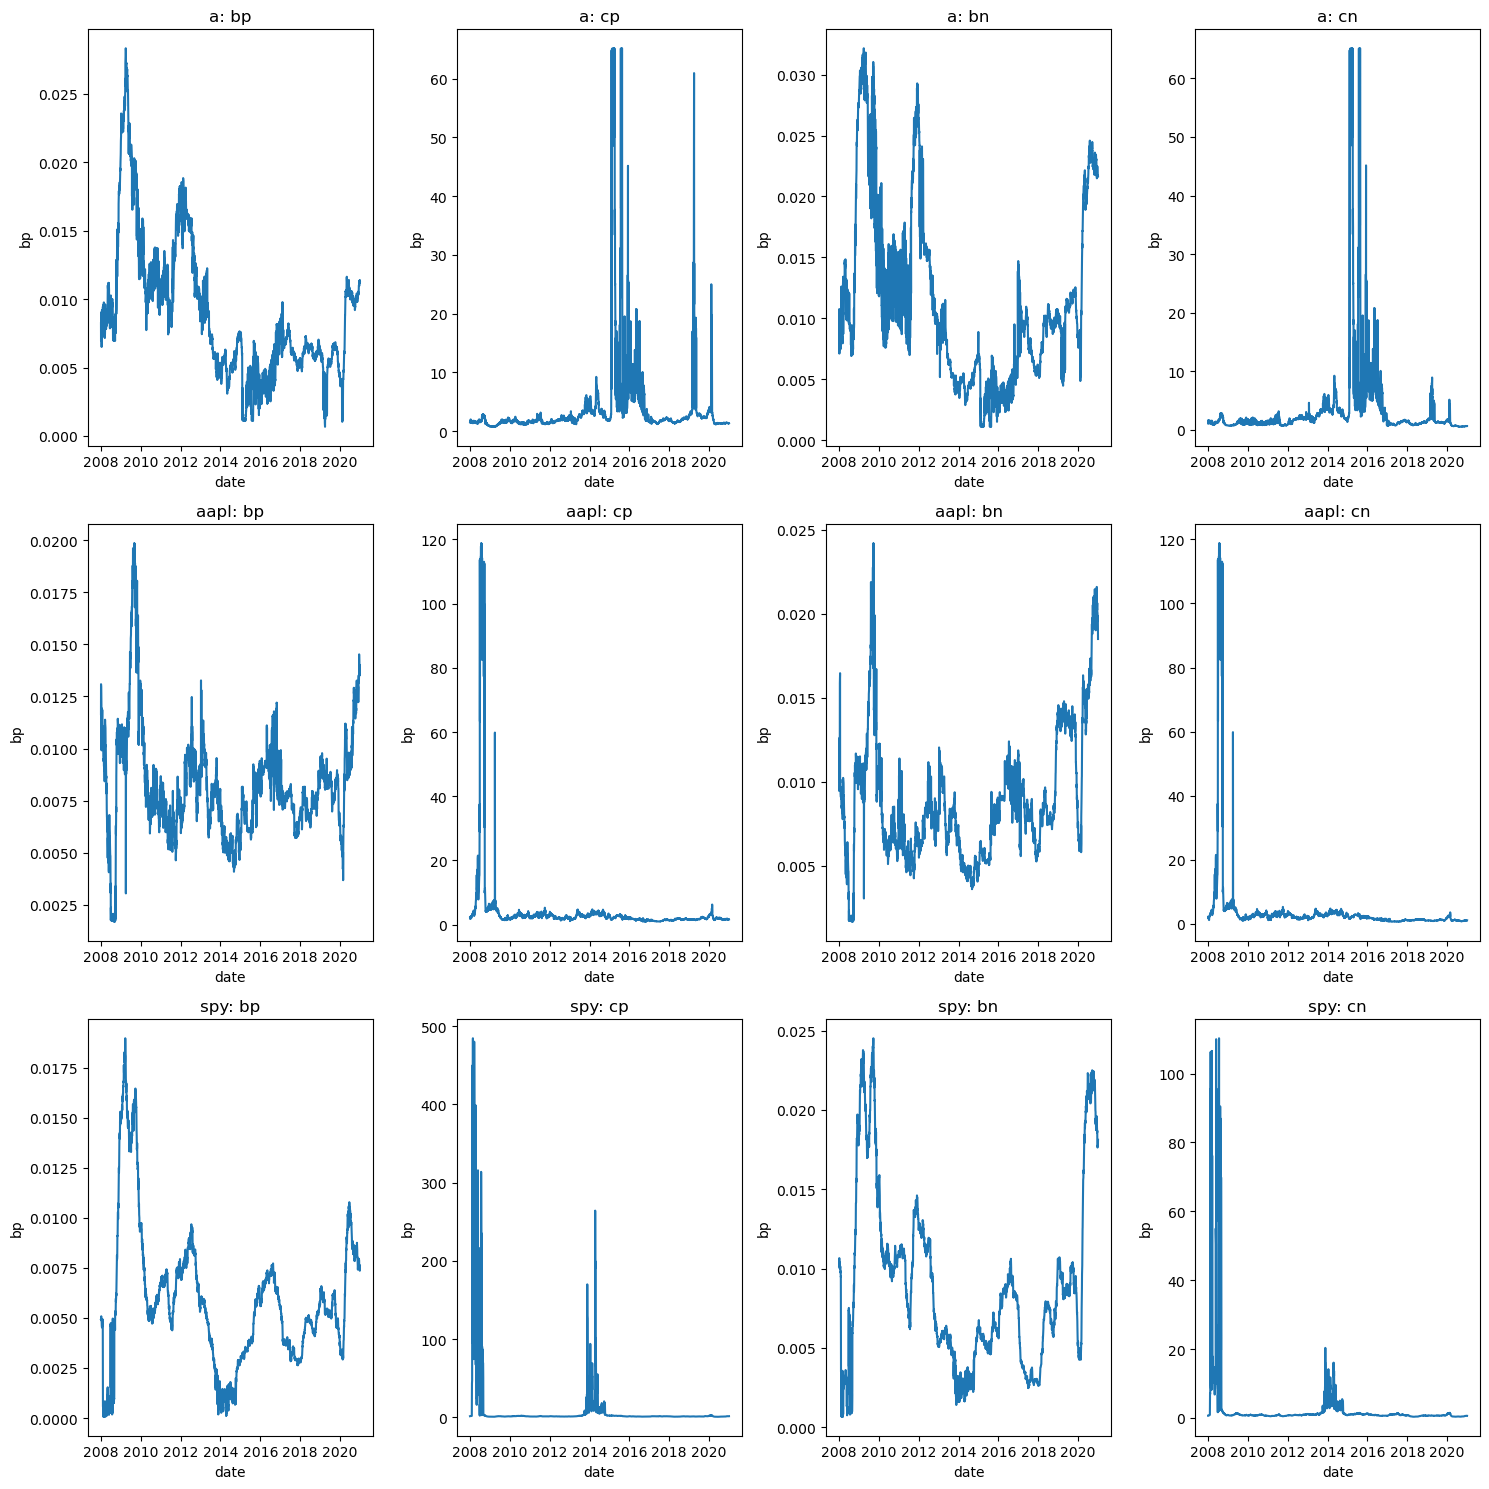

In [87]:
tickers = ['a','aapl','spy']
Base = BaseClass(tickers = tickers)
var = ["bp", "cp", "bn", "cn"]
t = 0
i = 0
Base.df[tickers[t]][var[i]].values
Base.visualization_ts_bc(tickers = ['a','aapl','spy'])